# Cutflow Validation

**Goal** It's been awhile since I redid a cutflow challenge, and I think some stuff has changed in the hh-resolved-recon framework, and I keep refactoring my code, so I'm going to take a look again.

In [22]:
import pandas as pd
import numpy as np
import uproot
import glob

import sys
sys.path.append("../code")
from preprocess import triggers,fileDir

### Step 1: Get the cutflow from my script

In [20]:
fDir = "../data/SMNR_PFlow-MAY2019/"
fName = "files/df_f_0.22_00*_entry_*.h5"

In [136]:
myFiles = fDir + fName
dfs = []
    
cols = ["2015_triggers",
        "HLT_2j35_btight_2j35_L13J25.0ETA23",
        # Note: it shouldn't make a difference whether I look at this or not, 
        # b/c it's not ever on for mc
        #"HLT_2j35_btight_2j35_L14J15.0ETA25",
        "HLT_j100_2j55_bmedium",
        "HLT_j225_bloose",
        "2016_triggers",
        "HLT_2j35_bmv2c2060_split_2j35_L14J15.0ETA25",
        "HLT_j100_2j55_bmv2c2060_split",
        "HLT_j225_bmv2c2060_split",
        'mcEventWeight', 'nbtags',
        'fourGoodJets', 'MDR', 'MDpT', 'cut_deta_hh', 'cut_Xwt', 'cut_Xhh',
        'mc_sf','nValidPairs','HC1_pt','HC2_pt','chosenPair','m4j','eventNumber']
    
cols += ['pair{}_HC{}_dRjj'.format(pi,hci) for pi in range(3) for hci in [1,2]]
    
for i, myFile in enumerate(glob.glob(myFiles)):

    print('{}. {}'.format(i+1,myFile))
    
    try:
        df = pd.read_hdf(myFile,key='df')
    except OSError:
        print('ERROR could not read file... SKIPPING.')
    # Note: I need the trigger array separate so that I could load everything into memory
    dfs.append(df[cols])
    
miniNtuple = pd.concat(dfs)

1. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_23225_24154.h5
2. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_19509_20438.h5
3. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_5574_6503.h5
4. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_3716_4645.h5
5. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_32515_33444.h5
6. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_30657_31586.h5
7. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_7432_8361.h5
8. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_16722_17651.h5
9. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_0_929.h5
10. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_12077_13006.h5
11. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_4645_5574.h5
12. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_20438_21367.h5
13. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_000006_entry_17651_18580.h5
14. ../data/SMNR_PFlow-MAY2019/files/df_f_0.22_0

In [76]:
for c in df.columns:
    print(c)

eventNumber
nresolvedJets
nmuon
passedTriggerHashes
resolvedJets_E
resolvedJets_pt
resolvedJets_phi
resolvedJets_eta
resolvedJets_MV2c10
resolvedJets_is_MV2c10_FixedCutBEff_70
muon_pt
muon_eta
muon_phi
muon_m
muon_EnergyLoss
resolvedJets_SF_MV2c10_FixedCutBEff_70
mcChannelNumber
mcEventWeight
mc_sf
pair0_HC1_m
pair0_HC1_dRjj
pair0_HC1_pt
pair0_HC1_eta
pair0_HC1_phi
pair0_HC2_m
pair0_HC2_dRjj
pair0_HC2_pt
pair0_HC2_eta
pair0_HC2_phi
pair1_HC1_m
pair1_HC1_dRjj
pair1_HC1_pt
pair1_HC1_eta
pair1_HC1_phi
pair1_HC2_m
pair1_HC2_dRjj
pair1_HC2_pt
pair1_HC2_eta
pair1_HC2_phi
pair2_HC1_m
pair2_HC1_dRjj
pair2_HC1_pt
pair2_HC1_eta
pair2_HC1_phi
pair2_HC2_m
pair2_HC2_dRjj
pair2_HC2_pt
pair2_HC2_eta
pair2_HC2_phi
pair0_Dhh
pair1_Dhh
pair2_Dhh
HC1_pt
HC1_eta
HC1_phi
HC1_m
HC1_ntag
HC2_pt
HC2_eta
HC2_phi
HC2_m
HC2_ntag
j0_pt
j0_eta
j0_phi
j0_m
j0_idx
j1_pt
j1_eta
j1_phi
j1_m
j1_idx
j2_pt
j2_eta
j2_phi
j2_m
j2_idx
j3_pt
j3_eta
j3_phi
j3_m
j3_idx
m4j
nbtags
chosenPair
nValidPairs
HC1_vecSum_pt
HC2_vecSum

In [65]:
# Make a new trigger which includes the 2015 and 2016 trigger
miniNtuple['2015+2016_triggers'] = miniNtuple['2015_triggers'] & miniNtuple['2016_triggers']

In [66]:
btags = '4b'
triggerFirst = False

trigger = '2015+2016_triggers'

x = ['4 jets $p_T > 40$ GeV, $|\eta| < 2.5$: {}-tags'.format(btags),
     'MD $\Delta R_{jj}$', 'MD $p_T(h)$s',
     '$|\Delta \eta_{hh}| < 1.5$','$X_{wt} > 1.5$',
     '$X_{hh}$ < 1.6']
    
base_masks = [miniNtuple.fourGoodJets, miniNtuple.MDR, 
              miniNtuple.MDpT, miniNtuple.cut_deta_hh,
              miniNtuple.cut_Xwt, miniNtuple.cut_Xhh]

if btags == '4b':
    bmask = (miniNtuple.nbtags >= 4)
elif btags == '2b':
    bmask = (miniNtuple.nbtags == 2)
else:
    print("Error: Don't have functionality to run over the {} option for btags".format(btags))
base_masks = [mi & bmask for mi in base_masks]

if triggerFirst:
    cf_masks = [miniNtuple[trigger]] + [mi & miniNtuple[trigger] for mi in base_masks]
    x = [trigger] + x
else:
    cf_masks = base_masks + [miniNtuple.cut_Xhh & miniNtuple[trigger]]
    x = x + [trigger]
    
# Then also look at the impact of XhhCommon on the events 
miniNtuple['miniNtuple'] = True
cf_masks = [miniNtuple.miniNtuple] + cf_masks
x = ['XhhCommon'] + x

counts = [np.sum(mask)  for mask in cf_masks]

In [67]:
counts

[36832, 4192, 3013, 59, 59, 59, 0, 0]

In [70]:
miniNtuple.nValidPairs.min(),miniNtuple.nValidPairs.max()

(0, 3)

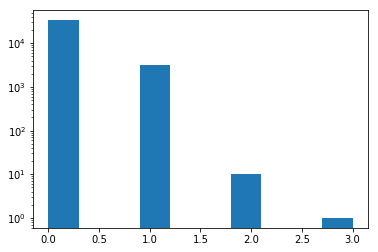

In [71]:
import matplotlib.pyplot as plt
plt.hist(miniNtuple.nValidPairs,log=True)
plt.show()

In [75]:
np.min(miniNtuple.HC1_pt - miniNtuple.HC2_pt)

-35.53148771884217

Hmmm.... ok, maybe I just need to do some sanity checks to understand how I coded up these MDR cuts?

In [103]:
hc1_cols = ['pair{}_HC1_dRjj'.format(i) for i in range(3)]
hc2_cols = ['pair{}_HC2_dRjj'.format(i) for i in range(3)]

lead_dR_arr = miniNtuple.loc[miniNtuple.fourGoodJets,hc1_cols]

In [104]:
N = np.sum(miniNtuple.fourGoodJets)

chosen_mask = np.zeros((N,3)).astype(bool)

for i,pidx in enumerate(miniNtuple.loc[miniNtuple.fourGoodJets,'chosenPair']):
    chosen_mask[i,pidx] = True
    

In [105]:
lead_dRjjs = lead_dR_arr.values[chosen_mask]

In [93]:
lead_dR_arr.shape

(5322, 3)

In [94]:
chosen_mask.shape

(5322, 3)

In [97]:
chosen_mask

array([[False,  True, False],
       [False, False,  True],
       [ True, False, False],
       ...,
       [False,  True, False],
       [ True, False, False],
       [ True, False, False]])

In [99]:
lead_dRjjs.shape

(5322,)

In [111]:
# For overlaying these curves!
m4j_min, m4j_max = 1, 1250 # GeV
m4j = np.linspace(m4j_min, m4j_max) 

Rmin_lead = 360 / m4j - 0.5
Rmax_lead = 653 / m4j + 0.475

Rmin_subl = 235 / m4j
Rmax_subl = 875 / m4j + 0.35

In [119]:
plt.hist2d(miniNtuple.loc[miniNtuple.fourGoodJets,'m4j'],lead_dRjjs,
           bins=25,range=[(0,1500),(0,4)],cmap='RdPu')
plt.title('lead HC')


plt.plot(m4j,Rmin_lead, 'k')
plt.plot(m4j,Rmax_lead, 'k')

plt.colorbar()

plt.show()

Let's try to understand why we have these points above the $\Delta R_{jj}^{max}$

In [ ]:
for 

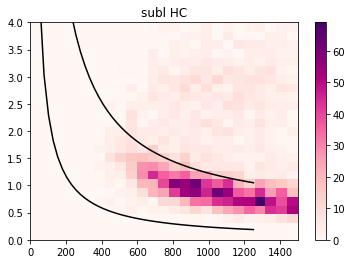

In [120]:
subl_dR_arr = miniNtuple.loc[miniNtuple.fourGoodJets,hc2_cols]
subl_dRjjs = subl_dR_arr.values[chosen_mask]

plt.hist2d(miniNtuple.loc[miniNtuple.fourGoodJets,'m4j'],subl_dRjjs,
           bins=25,range=[(0,1500),(0,4)],cmap='RdPu')
plt.title('subl HC')

plt.plot(m4j,Rmin_subl, 'k')
plt.plot(m4j,Rmax_subl, 'k')

plt.colorbar()

plt.show()

In [122]:
from preprocess import dRjj_cut

In [127]:
for i,pidx in enumerate(miniNtuple.loc[miniNtuple.fourGoodJets,'chosenPair']):
    
    i_m4j = miniNtuple.loc[miniNtuple.fourGoodJets,'m4j'].values[i]
    if (lead_dRjjs[i] > 652.863 / i_m4j + 0.474449):
    
        print('chosenPair',pidx)
        print('lead dRjjs',lead_dRjjs[i])
        print('dRjj_cut',dRjj_cut(lead_dR_arr.values[i],i_m4j,360 ,-0.5, 652.863, 0.474449, 0, 0.9967394))
        break

chosenPair 0
lead dRjjs 2.9014012739312283
dRjj_cut [False False False]


In [84]:
lead_dR_arr

pair0_HC1_dRjj  pair1_HC1_dRjj  pair2_HC1_dRjj
entry                                                
23236        2.826918        0.807182        2.880178
23237        3.044830        3.127816        0.538624
23248        0.850082        3.092138        2.810455
23252        0.554540        3.131965        3.189942
23256        1.051601        2.978377        0.580524
23258        2.897862        0.516996        3.065058
23283        0.555266        1.688650        3.068862
23291        2.901401        2.066035        3.087077
23297        3.027968        4.447092        0.628515
23300        0.813716        3.316739        2.798314
23308        1.056864        3.138185        3.052649
23316        3.363286        2.367989        0.983099
23326        1.888570        3.198426        0.747347
23328        3.017549        0.773782        3.279604
23335        0.745520        2.837690        3.086089
23337        0.590799        3.021600        2.807569
23341        3.666128        2.805894        1.321647
23345        2.559225        3.152414        4.412603
23346        0.443091        2.253985        3.119566
23351        3.259536        3.024762        2.224219
23356        2.488290        2.893779        1.093975
23369        3.217775        0.771317        3.460623
23400        1.424250        4.051414        3.230094
23401        2.971341        3.066246        0.644991
23405        2.985842        2.796033        0.689787
23407        2.803648        3.206015        2.182800
23409        3.226371        3.443311        0.581004
23412        2.818889        0.492042        2.628730
23413        0.890700        2.370414        3.086603
23414        3.022738        0.810176        2.940275
...               ...             ...             ...
19341        2.169966        2.950563        0.780752
19353        2.430549        0.457788        2.961917
19358        2.590967        3.061372        2.701290
19377        0.417519        3.104099        3.287890
19378        0.630221        2.703264        2.614688
19382        3.231729        0.903480        3.246484
19383        0.587335        3.395789        3.414435
19389        3.288064        0.719473        2.639247
19409        0.665074        3.092256        2.892170
19416        0.853206        2.752199        3.234901
19421        0.930903        2.991786        2.569138
19423        2.863489        2.242860        1.642280
19428        2.968185        0.964804        2.260754
19432        4.333961        1.105558        3.646771
19436        1.001683        2.739735        2.673195
19438        2.422827        1.293416        3.119111
19440        3.055049        2.814244        0.657273
19448        3.385437        1.005799        3.409166
19449        0.953111        2.918397        2.635112
19458        2.800524        2.377995        0.542686
19464        0.576198        3.365598        3.220752
19472        2.824639        3.058846        0.609413
19480        2.209807        2.690201        1.360235
19485        3.431491        1.260947        2.653729
19491        2.983873        1.083777        2.744239
19495        2.711026        1.138167        2.905648
19496        0.824135        2.634409        2.949841
19498        2.318553        0.599882        2.603409
19506        2.461357        0.512152        2.833589
19508        0.515967        3.096545        2.873906

[5322 rows x 3 columns]

In [133]:
fullmassplane = resRecon[ b'fullmassplane;1'].pandas.df()

In [139]:
fullmassplane.tail()

run_number  event_number     mc_sf  ntag  njets  kinematic_region  \
entry                                                                      
10261      283429        558119  0.000336     4      5                 0   
10262      302053        558047 -0.000718     3      4                 2   
10263      304008        554641  0.000095     3      4                 0   
10264      310634        554437  0.000457     2      4                 2   
10265      310341        558864 -0.000025     4      5                 0   

             m_hh       pt_hh      X_wt        m_h1  ...    pT_h2_j2  \
entry                                                ...               
10261  563.213112  112.529354  5.604040  119.737374  ...  154.040283   
10262  315.089697  105.734879  3.157801  150.246697  ...   61.353672   
10263  733.457211   36.067857  6.023939  125.668390  ...  208.414703   
10264  514.819033   62.956817  6.200407  152.878394  ...  181.851608   
10265  853.433655  125.395763  5.193486  125.060224  ...  237.730942   

       eta_h2_j2  phi_h2_j2  tag_h2_j2  angle_h2_j2       pT_4        pT_2  \
entry                                                                        
10261  -0.349413  -2.538968       True     1.108627  69.529961  154.040283   
10262  -1.258895  -2.433885      False     2.103384  55.585110   74.296494   
10263  -0.649113   1.537803       True     1.235779  80.745979  208.414703   
10264  -1.169507  -1.306767      False     0.629241  42.345200  130.806473   
10265  -0.676345   1.810640       True     1.282662  73.415932  237.730942   

          eta_i    dRjj_1    dRjj_2  
entry                                
10261  0.488623  0.761090  1.077173  
10262  1.548112  1.656100  1.767664  
10263  0.461801  0.761035  0.842368  
10264  0.804774  1.247391  1.320614  
10265  0.412774  0.516126  0.632852  

[5 rows x 52 columns]

**New debugging metric**

Let's look at individual event numbers that passed resolvedRecon but *not* my framework's code.

In [138]:
for evtNum in fullmassplane.event_number:
    if evtNum not in miniNtuple.index[miniNtuple.MDR]:
        print(evtNum)
    else:
        print('Fine')

461792
461655
463001
461616
463330
463863
461759
463651
461202
461981
463597
461504
463420
463259
463935
461059
461666
461607
461004
461921
461187
461028
461845
463625
463914
461264
463666
463254
461844
463453
461126
463177
461793
461255
461798
463057
463249
461221
461720
461692
461902
463954
463371
461469
463470
461926
461665
461829
461486
463758
461833
463377
463579
461319
463950
461529
463900
461882
463120
461624
463598
463757
463495
463694
461087
461701
463923
463491
461518
463565
463378
463929
461962
463209
461989
463157
463072
463472
461661
461731
463940
463035
461340
461097
463753
463922
463335
463649
461676
463361
463888
461614
463462
463818
461030
461458
461401
461549
461262
461598
461940
463961
461988
463354
461468
461231
463136
463428
461251
463458
463106
463552
461160
463790
461673
461597
463067
463707
463838
461509
461176
463917
463959
461447
463340
463546
463244
463733
461855
461353
463490
463684
463373
463105
461864
463398
463795
463240
461797
463376
463524
463262
461007

25089
50676
50039
25026
25792
25144
25828
25509
25455
25022
25169
25020
25170
50667
25262
25024
50784
25970
25681
50746
25219
Fine
Fine
50673
25905
25958
Fine
25361
25390
25297
50336
50720
25454
50588
50915
Fine
Fine
25439
25377
50475
25078
25676
25289
25283
50919
25106
50695
Fine
25644
50776
25555
50288
50200
50197
50943
25701
50393
50756
50294
50386
25766
25069
25174
50556
25973
50081
50363
50703
50668
25912
25810
25244
25215
Fine
50931
Fine
50702
25006
Fine
285420
285309
792991
285378
285446
792501
792882
792292
792048
792597
285403
285166
792062
792845
285941
285259
285029
792883
285559
792878
792155
285299
792515
285880
792215
792162
285649
285884
792369
285142
285239
285790
792985
285137
792791
285810
792425
792319
792990
792322
285572
285136
285351
285365
285517
285850
285036
285908
792091
285449
285743
285236
792793
285302
792545
285744
792458
285592
792168
285037
792192
792675
285476
285386
285736
285379
285762
285605
792202
792229
285214
285204
792557
792301
285545
285603
285

952233
946072
952817
946325
946495
946778
952945
952610
946402
946479
946381
952897
946571
952053
946922
952512
952612
952784
946221
946774
952393
946802
952736
952175
952300
946009
946702
946604
946309
946255
952626
946916
946850
952476
946169
952325
946882
952315
946342
952543
952876
946641
946818
952594
946509
952094
952425
952992
946116
952832
952573
952136
946179
952523
946174
946751
946480
952198
952504
946670
952183
946619
946468
946360
946572
952096
946585
952253
952436
946474
952617
946403
946611
952805
946829
946812
952072
946157
946187
952565
946735
946141
946895
952266
952539
952070
952460
952224
952679
952782
952462
946209
952855
946569
952500
952348
952776
952001
946856
952107
952210
952737
946584
946759
946981
952127
952908
946664
952718
952186
946501
952559
946974
946376
946579
952061
952353
946129
952236
946308
946953
952231
952979
946780
952905
946114
946369
946237
952963
952337
946115
946733
952081
952173
946635
946555
952707
952412
952291
946014
946602
952893
952494

473132
473459
473352
473284
473926
484488
484275
473191
484479
473466
473081
473504
484545
473265
473724
484790
473180
473249
484161
484724
473467
484855
484532
484666
484958
473146
484367
473803
473501
484185
484278
484861
484533
484780
473938
484631
484451
484080
473345
484287
484926
473514
484068
484438
473252
484054
484777
473739
484268
473609
484878
484587
484135
484285
473346
484156
473150
484799
484951
484208
484167
473820
484858
473580
473652
484596
484270
473157
473126
473290
473235
484917
484577
484377
473463
473133
473400
484980
473067
473129
473974
473333
484427
473363
473214
473477
484518
473197
473918
484972
473644
473914
484893
473878
484459
473867
473919
484925
473049
484329
473730
473306
473790
473077
473696
473960
484669
484663
473401
473757
473118
473247
484302
484231
473001
473702
473857
473847
484490
484369
473963
473815
473732
473366
473835
484728
473789
484111
473972
484806
484044
473124
484225
473313
484467
473585
484214
473375
484398
484931
484017
484249
473479

568386
568737
568953
569685
568046
568350
568871
568339
569806
568364
568228
569230
568582
569506
569353
569070
569221
568916
569996
568783
569459
569159
568244
569519
568669
568028
568938
568522
568154
568193
569286
568023
568188
569052
569372
568903
569785
568184
569530
568322
569665
569794
569225
704699
694470
694115
704233
704263
704807
704732
704713
704819
694131
704149
704035
694246
694452
694673
704838
694386
694078
694742
694635
694358
694479
704597
694741
694870
704647
694135
704668
694641
704894
694483
704436
694934
694242
704362
704169
694541
704311
694748
704227
704742
694340
704165
704990
694497
704736
704739
694024
704334
704232
704122
704469
694512
694510
704026
704247
694771
694892
704444
704706
694636
694785
694695
694231
694328
704886
694634
704130
704682
704896
694252
694551
694941
704595
694056
694266
704923
704433
694951
694138
704994
694114
704914
694693
694709
694019
704059
704805
694448
704257
704024
694375
704145
694876
694797
694556
704716
694302
704912
694220

554179
554052
554436
558807
558433
558941
554479
554477
554993
558793
558985
558458
554273
558106
558521
558642
558036
558713
558898
554881
554226
554343
554175
558666
558859
554560
558452
554213
558540
558122
554363
558879
554066
554556
554771
558523
558216
554237
558210
558184
558161
558530
554245
554394
558057
554400
558591
558533
558373
558160
554511
558265
554760
558754
554887
554056
558874
554259
554253
558120
558631
558979
558722
558617
554880
554096
554933
554799
558571
558993
554289
554154
558192
554741
554248
554530
554782
554862
558114
558963
558425
558545
554119
554151
554326
558891
558084
558965
554292
558100
558872
558612
554417
554967
558935
558550
558526
554920
554069
554370
554254
554335
558520
554525
558562
558502
554080
554908
554675
558493
558229
554954
554287
554010
554469
554046
558477
558376
554337
558701
554107
554630
554267
558812
558214
558413
554504
558104
554377
554228
554534
558371
554328
554999
558843
554704
558676
558506
558444
558348
558918
558283
558821

203189
190174
190555
203770
190281
190022
203658
190175
203370
190068
190038
190251
203519
203286
203931
190001
203623
190767
190007
203883
190558
190471
203850
190748
190784
203733
203384
190398
190280
203074
203204
190434
190099
190960
203911
190979
190284
203681
203656
190841
190429
203325
203699
203072
203708
203575
190209
203129
203808
190766
190136
190055
190285
190090
190752
190053
203869
190532
203287
203323
190096
190238
203319
190035
203487
190078
190366
190450
203191
190728
203054
190258
190723
203659
190579
203535
203650
203337
190340
203891
190384
203232
190742
190315
203363
203642
203935
203469
203544
190246
190546
190759
203380
190279
203394
190355
203068
190943
190214
203104
203236
190895
203953
190039
190992
190369
190474
190255
190713
190590
190973
190750
203099
190701
190695
190108
203097
190448
203156
203668
203680
190424
203910
203629
190436
190931
190582
203704
203098
203838
203473
190648
190966
190530
203691
203726
190592
190342
203444
203949
203652
203195
203127

761307
741380
761173
761213
761077
761500
741836
761080
761954
741332
761795
761768
741108
741589
761574
761329
741069
741690
741032
761105
761621
761427
761342
761787
761900
761145
741432
741274
741503
761713
741973
741687
761447
761404
741315
761639
741541
761002
761901
761386
741880
761222
761036
761230
761424
741034
741214
761825
741269
761982
741907
761387
761502
741176
761151
761287
761972
761910
761883
761523
761753
741678
761229
761627
761233
741431
761430
761945
741917
761511
761757
741443
761873
741202
741740
761748
761905
741341
741023
761617
741619
761862
741471
741168
741932
761885
761184
761353
761224
761889
761010
741306
761691
741950
761832
761971
741360
761380
761987
741560
454891
454185
456108
454321
456268
454906
454785
456201
454967
454500
454837
456553
456245
454170
454018
454814
456053
456001
454361
454453
454952
454777
456430
454211
456976
454972
456192
454996
454187
454370
456007
454021
456183
456994
454221
454142
454840
454431
454885
456264
456117
454721
454734

I tried printing out the event numbers, but it seems that something different is getting saved, so I'm going to go ahead and table this and ask someone *tomorrow*.

### Step 2: Get the cutflow from Beojean's script

In [53]:
resRecon = uproot.open("../../hh4b-resolved-reconstruction/smnr_06_noTrigger.root")
resRecon[b'FourTagCutflow;1'].show()

                                                    0                      63000
                                                    +--------------------------+
(underflow)                                   0     |                          |
Initial                                       60000 |************************* |
Selected                                      60000 |************************* |
NTuple                                        36832 |***************           |
Trigger                                       36832 |***************           |
4 good jets(pT ≥ 40 GeV, η ≤ 2.5), ≥ 2 tagged 27342 |***********               |
Four Tagged                                   4192  |**                        |
Valid                                         3763  |**                        |
pT(h)s                                        3152  |*                         |
Δη_hh                                         2922  |*                         |
Muon LepTop                 

In [141]:
myMod = uproot.open("../../hh4b-resolved-reconstruction/smnr_06.root")[b'fullmassplane;1'].pandas.df()
myMod

run_number  event_number     mc_sf  ntag  njets  nValidPairs  \
entry                                                                 
0          302925        742169  0.000351     3      5            1   
1          303304        710056  0.000217     3      4            1   
2          310809        710118  0.000032     4      5            1   
3          311244        710218  0.000552     3      4            1   
4          307514        742381  0.000013     2      4            1   
5          300687        710313  0.000022     4      5            1   
6          303499        710515  0.000167     4      5            1   
7          310738        710971 -0.000866     2      4            2   
8          310249        742960 -0.000216     4      4            1   
9          305735        710571  0.000478     2      4            3   
10         303832        742597  0.000018     3      5            1   
11         304243        710716 -0.000008     3      4            1   
12         311071        742806  0.000299     3      4            1   
13         305811        742557 -0.000725     2      4            1   
14         310969        710910  0.000016     4      5            1   
15         302137        742511  0.000329     2      6            1   
16         310872        742074  0.000451     2      4            1   
17         309390        710677  0.000466     3      4            1   
18         284285        742334  0.000029     3      4            1   
19         310249        710473 -0.000014     3      4            1   
20         307454        742101  0.000030     4      5            1   
21         310691        710269  0.000043     3      4            1   
22         303266        710949  0.000088     3      4            1   
23         303304        710788  0.000014     4      4            1   
24         311244        710184  0.000219     3      5            1   
25         305380        710286  0.000027     3      6            1   
26         310809        742036  0.000010     2      5            1   
27         307306        742454  0.000149     4      5            1   
28         303304        710306 -0.000652     2      4            2   
29         309516        710555  0.000016     2      5            1   
...           ...           ...       ...   ...    ...          ...   
9520       306269        472135  0.000172     3      5            1   
9521       311170        468567  0.000248     3      6            1   
9522       279284        472660  0.000313     2      6            1   
9523       310249        468137  0.000050     3      4            1   
9524       311287        472263  0.000510     4      5            3   
9525       302393        472868  0.000050     2      5            1   
9526       307394        472113  0.000252     3      4            1   
9527       302919        468762  0.000144     4      5            1   
9528       311244        472507  0.000009     2      6            1   
9529       305618        472536  0.000095     3      4            1   
9530       310634        468158  0.000594     3      4            1   
9531       311287        468810  0.000029     4      4            1   
9532       299144        468680  0.000071     4      4            1   
9533       303338        468061  0.000013     4      4            1   
9534       300687        472327 -0.000215     2      4            1   
9535       302391        468496  0.000793     3      4            2   
9536       302393        472180  0.000031     3      7            1   
9537       300800        472982  0.000010     3      5            1   
9538       302393        472241  0.000217     3      5            1   
9539       280950        468917 -0.000018     3      5            1   
9540       310809        468067  0.000145     4      4            1   
9541       301932        468947  0.000033     2      4            1   
9542       283780        472096  0.000587     4      5            1   
9543       300571        472002

Sanity check: Let's look at whether the nValidPairs has approximately the correct distribution!

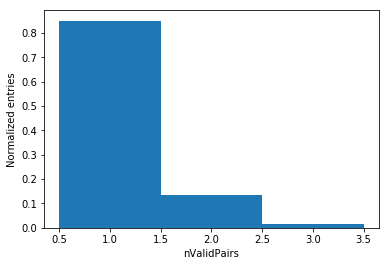

array([0.85064448, 0.13560338, 0.01375214])

In [146]:
n,_,_ = plt.hist(myMod.nValidPairs,3,(0.5,3.5),density=True,weights=myMod.mc_sf)
plt.xlabel('nValidPairs')
plt.ylabel('Normalized entries')
plt.show()

n

**Question:** Ok, this is using more than just the 2016 triggers, but it seems to have $\approx$ consistent results, so I'm going to forge ahead on the assumption that this is ok.

In [ ]:
df = pd.DataFrame(b_4tag.astype(int),index=col_4tag,columns=['resolved-recon'])

In [ ]:
my_col = 'My framework'
df[my_col] = 0

Step 1: Access the meta-data

I'll just need to open the SM NR file that I was running over.

In [ ]:
myFile = fileDir['SMNR'] + "user.bstanisl.17142219._000001.MiniNTuple.root"

treeName = "MetaData_EventCount_XhhMiniNtuple"
metadata = uproot.open(myFile)[treeName]

In [ ]:
for key, val in zip(metadata.xlabels,metadata.values):
    print(key,val)

In [ ]:
df.loc['Initial',my_col] = int(metadata.values[0])
df.loc['Selected',my_col] = int(metadata.values[1])

Step 2: Get the right triggers

For the version of `resolved-recon` that I ran, Beojean wasn't separating out the 2015 and 2016 triggers, so for a one to one comparison with his 4b cutflow, I should be doing the same thing as him.

In [ ]:
val = [sum([(ti.decode() in triggers[2015]+triggers[2016]) for ti in ti_list])> 0 for ti_list in test_df.passedTriggers]
test_df['trigger_15+16'] = pd.Series(val,index=test_df.index)

In [ ]:
test_df[['trigger','trigger_15+16']].head()

Step 3: Look at everything that is inside the Ntuple.

In [ ]:
df.loc['Ntuple',my_col] = test_df.values.shape[0]

In [ ]:
df.loc['4 tagged',my_col] = test_df.fourGoodJets.sum()

In [ ]:
df.loc['$\Delta R_{jj}$',my_col] = test_df.MDR.sum()

In [ ]:
df.loc['$p_T(h)s$',my_col] = test_df.MDpT.sum()

In [ ]:
df.loc['$\Delta \eta_{hh}$',my_col] = test_df.cut_deta_hh.sum()

In [ ]:
df.loc['$X_{wt}$',my_col] = test_df.cut_Xwt.sum()

In [ ]:
df.loc['Trigger',my_col] = np.sum(test_df.cut_Xwt & test_df['trigger_15+16'])

In [ ]:
df.loc['Signal',my_col] = np.sum(test_df.cut_Xhh & test_df['trigger_15+16'])

In [ ]:
x_CR = np.sqrt((test_df.HC1_m - 120*1.03)**2 + (test_df.HC2_m - 110*1.03)**2)
df.loc['Control',my_col] = np.sum((x_CR < 30) & (test_df.Xhh > 1.6) & test_df.cut_Xwt & test_df['trigger_15+16'])

In [ ]:
x_SB = np.sqrt((test_df.HC1_m - 120*1.05)**2 + (test_df.HC2_m - 110*1.05)**2)
df.loc['SB',my_col] = np.sum((x_SB < 45) & (x_CR > 30) & test_df.cut_Xwt & test_df['trigger_15+16'])

In [ ]:
df

Note: The values in the internal note have more significant digits than the numbers in the paper, so I'll use the values from the int note.

In [ ]:
# control
120*1.03,110*1.03 

In [ ]:
# sideband
120*1.05,110*1.05 